## Regra de Sturge

Otimiza o número de classe dentro de uma populção

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('dados.csv')


In [3]:
# Capturando o número de registros da tabela
# A função .shape retorna (nº de registros, nº variáveis)
n = data.shape[0]
n

76840

In [4]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

### Resultado

O resultado demonstra que baseado no número de registros presentes na base de dados a melhor maneira de visualizar os registros é dividindo em ~17.285291187298853 classes

In [5]:
# Método para arredondar resultado
k = int(k.round(0))
k

17

## Criando DataFrame

In [6]:
# Calculo de Frequência

frequencia_em_intervalo = pd.value_counts(
    pd.cut(
        x = data.Renda,
        bins = 17, # Usando o resultado arrendondado da formúla Sturge
        include_lowest=True
    ),
    sort=False
)

frequencia_em_intervalo

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [7]:
# Calculo de percentual por distribuição
percentual = pd.value_counts(
    pd.cut(
        x = data.Renda,
        bins = 17, # Usando o resultado arrendondado da formúla Sturge
        include_lowest=True
    ),
    sort=False,
    normalize=True
) * 100

percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [8]:
dist_dataframe_personalizada = pd.DataFrame({'Frequência':frequencia_em_intervalo, 'Percentual (%)':percentual} )
dist_dataframe_personalizada.rename_axis('Classes', axis='columns', inplace=True)
dist_dataframe_personalizada

Classes,Frequência,Percentual (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


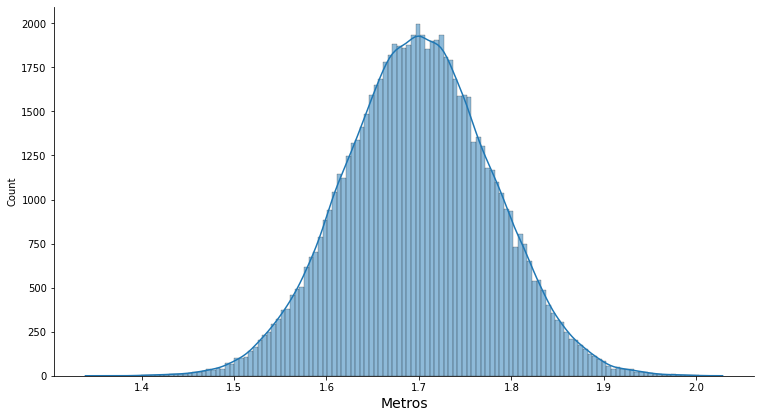

In [21]:
ax = sns.displot(data.Altura, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_titles('Distribuição de Frequência - Altura', fontsize=14)
ax.set_xlabels('Metros', fontsize=14)
ax